In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import keras
import glob
from tqdm import tqdm
import cv2
from keras.models import model_from_json

Using TensorFlow backend.
/home/dev/Documents/Project_age_gender/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dev/Documents/Project_age_gender/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dev/Documents/Project_age_gender/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/de

In [2]:
with open('../inceptionv4/model_v4/model_v4_dropout/finetune/history.pkl', 'rb') as f:
    history = pickle.load(f)

In [3]:
history.keys()

dict_keys(['val_loss', 'val_gender_output_loss', 'val_age_output_loss', 'val_gender_output_acc', 'val_age_output_acc', 'loss', 'gender_output_loss', 'age_output_loss', 'gender_output_acc', 'age_output_acc', 'lr'])

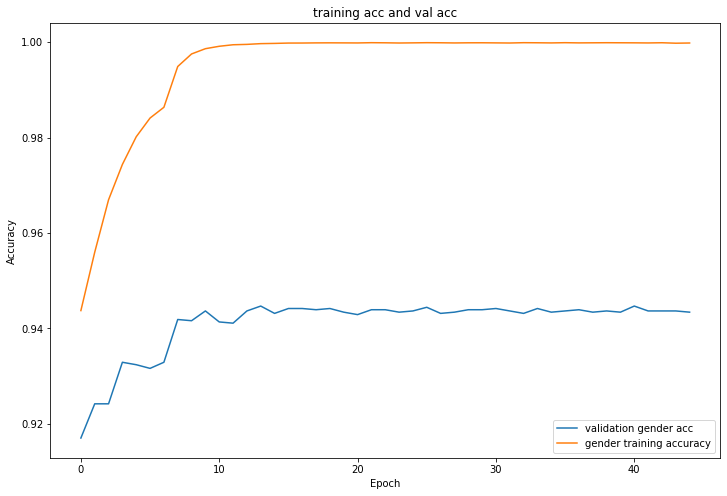

In [4]:
fig = plt.figure(figsize=(12,8))
numOfEpoch = 45
# plt.plot(np.arange(0, numOfEpoch), history['val_age_output_acc'], label='validation age acc')
plt.plot(np.arange(0, numOfEpoch), history['val_gender_output_acc'], label='validation gender acc')
# plt.plot(np.arange(0, numOfEpoch), history['age_output_acc'], label='Age training accuracy')
plt.plot(np.arange(0, numOfEpoch), history['gender_output_acc'], label='gender training accuracy')
plt.title('training acc and val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [5]:
json_file = open('../inceptionv4/model_v4/model_v4_dropout/finetune/inceptionv4.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

# load weights into new model
model.load_weights("../inceptionv4/model_v4/model_v4_dropout/finetune/inceptionv4.h5")
print("Loaded model from disk")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Loaded model from disk


In [6]:
opt = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt, loss={'age_output': 'categorical_crossentropy',
                                   'gender_output': 'categorical_crossentropy'},
              loss_weights={'age_output': 2.,
                            'gender_output': 1.},
              metrics={'age_output': 'accuracy',
                       'gender_output': 'accuracy'})

In [7]:

def evaluate(list_IDs_temp):
    """ generate data_agu containing batch_size samples"""

    X = []
    y_gender = []
    y_age = []
    #gen data_agu
    for path in list_IDs_temp:
        # store sample
        path = path.strip()
        img = cv2.imread(path)
        cvt_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image = cv2.resize(cvt_img, (224, 224))
        image = image.astype('float32')/255
        X.append(image)

        #    get label gender
        label_gender = path.split("/")[-2]
        y_gender.append(label_gender)

        # get label of age
        label_age = path.split("/")[-3]
        y_age.append(label_age)

    img = np.asarray(X)
    age_label = keras.utils.to_categorical(y_age, num_classes=10)
    gender_label = keras.utils.to_categorical(y_gender, num_classes=2)

    return img, [gender_label, age_label]


In [8]:
# set_age = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
# result = {}
# for i in set_age:
#     print("===============EVALUATE {}===============".format(i))
#     all_path = glob.glob('../data_agu/test/{}/*/*'.format(i))
#     X_val, label = evaluate(all_path)
#     _, age = model.evaluate(X_val, label)
#     result[i] = age

In [9]:
all_path = glob.glob('../data_agu/test/0/*/*')

In [10]:
X_val, label = evaluate(all_path)

In [11]:
X_val.shape

(3049, 224, 224, 3)

In [12]:
score, acc = model.evaluate(X_val, label)

3049/3049 [==============================] - 711s 233ms/step


ValueError: too many values to unpack (expected 2)

In [34]:
# #load data test
# def test(list_path, model):
#     true_predict = 0
#     count = 0
#     for path in tqdm(list_path):
#         # store sample
#         path = path.strip()
#         img = cv2.imread(path)
#         cvt_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         image = cv2.resize(cvt_img, (224, 224))
#         image = image.astype('float32')/255
#         label_age = path.split("/")[-3]
#         _, pro_age = model.predict(image.reshape(-1, 224, 224, 3))
#         age = np.argmax(pro_age)
#         # get label of age
#         if int(age) == int(label_age):
#             true_predict += 1
#         count += 1
#     return true_predict, count

In [35]:
# set_age = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']

In [ ]:
# all_path = glob.glob('../data_agu/test/*/0/*')
# true_predict, count = test(all_path, model)
# print("accuracy of label {} : {}".format(i, ac))
# print("==================================================")

In [ ]:
all_path

In [13]:
img = cv2.imread('test.jpg')

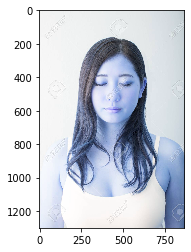

In [15]:
plt.imshow(img)

In [18]:
cv2.imwrite('test_bgr.jpg', img)

True

In [7]:
!pip install seaborn

     |████████████████████████████████| 215kB 547kB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [8]:
from scipy.stats import uniform
import seaborn as sns

[Text(0, 0.5, 'F'), Text(0.5, 0, 'uniform distribute')]

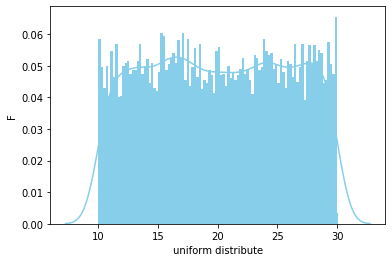

In [12]:
n = 10000
start = 10 
width = 20
data_uniform = uniform.rvs(size=n, loc=start, scale=width)
ax = sns.distplot(data_uniform, bins=100,rug=True, kde=True, vertical=False, color='skyblue', hist_kws={"linewidth":15, "alpha":1})
ax.set(xlabel='uniform distribute', ylabel='F')